<a href="https://colab.research.google.com/github/andressriosg/Topicos-en-Estadistica/blob/main/codigo_ayuda_tercer_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving D. MENORES.txt to D. MENORES.txt


In [4]:
import pandas as pd
import io
datos_menores = pd.read_csv(io.BytesIO(uploaded['D. MENORES.txt']), delimiter='\t')
datos_menores.head(4)

,Directorio,Nro_encuesta,Secuencia_encuesta,Secuencia_p,Orden,P51,P52,P52s1,P53,P54,...,P8582s3,P8582s4,P8582s11,P8582s6,P8582s7,P8582s9,P8582s12,P8582s10,P8582s10a1,Fex_c
0,447,247,4,1,4,4,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1454.129389
1,17255,247,3,1,3,1,NaN,NaN,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,663.046128
2,373,247,5,1,5,1,NaN,NaN,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.021859
3,373,247,4,1,4,1,NaN,NaN,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.021859


In [5]:
datos_menores.P52.isnull()

0       False
1        True
2        True
3        True
4       False
        ...  
4086    False
4087    False
4088     True
4089    False
4090    False
Name: P52, Length: 4091, dtype: bool

In [8]:
datos_menores.loc[datos_menores.P52.notnull(), "P52"]

0       5.0
4       5.0
5       5.0
6       5.0
7       4.0
       ... 
4085    4.0
4086    4.0
4087    1.0
4089    5.0
4090    5.0
Name: P52, Length: 2724, dtype: float64

In [30]:
tabla_menores = datos_menores[["P51", "P52", "P55", "P56", "P57", "P6159s8", "P6163s8", "P6161", "P6161s1"]]
tabla_menores1 = tabla_menores[tabla_menores.P52.notnull()]
tabla_menores1.head(4)

,P51,P52,P55,P56,P57,P6159s8,P6163s8,P6161,P6161s1
0,4,5.0,1,1,1,NaN,NaN,1,6.0
4,2,5.0,1,1,1,NaN,NaN,1,3.0
5,2,5.0,1,1,1,1.0,1.0,1,1.0
6,2,5.0,1,1,1,NaN,NaN,1,4.0


In [14]:
tabla_menores1.P52.value_counts()

P52
5.0    1597
4.0     647
1.0     229
3.0     119
2.0      70
6.0      62
Name: count, dtype: int64

In [31]:
tabla_menores1.P6159s8.isnull() # Las madres que no hacen ninguna actividad con los menores
tabla_menores1.loc[tabla_menores1.P6159s8.isnull(), "P6159s8"] = 2 # 2 denota las madres que sí hacen actividades con los hijos
tabla_menores1.P6163s8.isnull() # Los padres que no hacen ninguna actividad con los menores
tabla_menores1.loc[(tabla_menores.P6163s8.isnull()), "P6163s8"] = 2 # 2 denota los padres que sí hacen actividades con los hijos
tabla_menores1.P6163s8.value_counts()

P6163s8
2.0    2024
1.0     700
Name: count, dtype: int64

In [32]:
dummi_menores = pd.get_dummies(tabla_menores1, columns=["P51", "P52", "P55", "P56", "P57", "P6159s8", "P6163s8"], dtype = float)
dummi_menores.head(5)

,P6161,P6161s1,P51_2,P51_3,P51_4,P51_5,P51_6,P51_7,P51_8,P52_1.0,...,P55_1,P55_2,P56_1,P56_2,P57_1,P57_2,P6159s8_1.0,P6159s8_2.0,P6163s8_1.0,P6163s8_2.0
0,1,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,1,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [23]:
tabla_menores1.P6161.value_counts()

P6161
1    2210
2     514
Name: count, dtype: int64

In [33]:
dummi_menores.columns

Index(['P6161', 'P6161s1', 'P51_2', 'P51_3', 'P51_4', 'P51_5', 'P51_6',
       'P51_7', 'P51_8', 'P52_1.0', 'P52_2.0', 'P52_3.0', 'P52_4.0', 'P52_5.0',
       'P52_6.0', 'P55_1', 'P55_2', 'P56_1', 'P56_2', 'P57_1', 'P57_2',
       'P6159s8_1.0', 'P6159s8_2.0', 'P6163s8_1.0', 'P6163s8_2.0'],
      dtype='object')

In [34]:
dummi_menores.rename(columns = {'P51_2':'acu casa', 'P51_3':'acu trab', 'P51_4':'niñera', 'P51_5':"mayor", 'P51_6':"menor", 'P51_7':"solo", 'P51_8':"otra persona"}, inplace = True)
dummi_menores.rename(columns = {'P52_1.0':"lejos", 'P52_2.0':"costoso", 'P52_3.0':"sin cupo", 'P52_4.0':"casa", 'P52_5.0':"edad", 'P52_6.0':"otro motivo"}, inplace = True)
dummi_menores.rename(columns = {'P55_1':"si desa", 'P55_2':"no desa", 'P56_1':"si alm", 'P56_2':"no alm", 'P57_1':"si onces", 'P57_2':"no onces"}, inplace = True)
dummi_menores.rename(columns = {'P6159s8_1.0':"no comp madre", 'P6159s8_2.0':"si comp madre", 'P6163s8_1.0':"no comp padre", 'P6163s8_2.0':"si comp padre"}, inplace = True)
dummi_menores.head(5)

,P6161,P6161s1,acu casa,acu trab,niñera,mayor,menor,solo,otra persona,lejos,...,si desa,no desa,si alm,no alm,si onces,no onces,no comp madre,si comp madre,no comp padre,si comp padre
0,1,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,1,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [37]:
# "P51", "P52", "P55", "P56", "P57", "P6159s8" y "P6163s8", y, la salida es la variable "P6161"
x = dummi_menores.drop(["P6161", 'P6161s1'], axis = 1)
y = dummi_menores["P6161"].astype(str)
y.loc[(y == "1")] = "Si"
y.loc[(y == "2")] = "No"
y.value_counts()

P6161
Si    2210
No     514
Name: count, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [48]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(50,50,50, 50, 50, 50, 50),
                        max_iter = 300, activation = 'logistic',
                        solver = 'sgd') # Curva de pérdida adam o sgd

In [49]:
mlp_clf.fit(trainX, trainY) # Estimación de los parámetros sobre los datos de entrenamiento
y_pred = mlp_clf.predict(testX) # Predicción sobre los datos de validación (comparar la predicción con los datos de validación)

In [50]:
from sklearn.metrics import accuracy_score
print('Accuracy: {:.2f}'.format(accuracy_score(y_pred, testY)))

Accuracy: 0.82


Text(0.5, 1.0, 'Confusion Matrix')

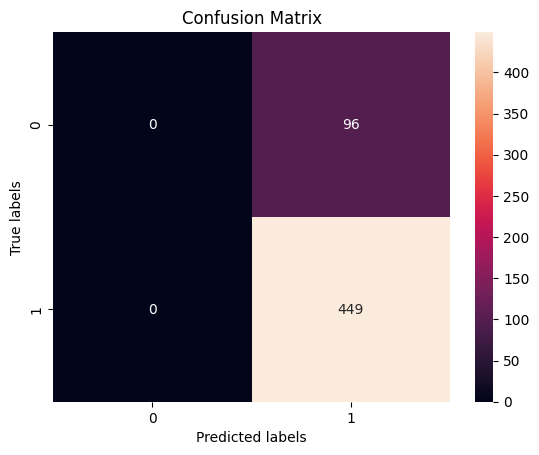

In [51]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(testY, y_pred)
cm
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')

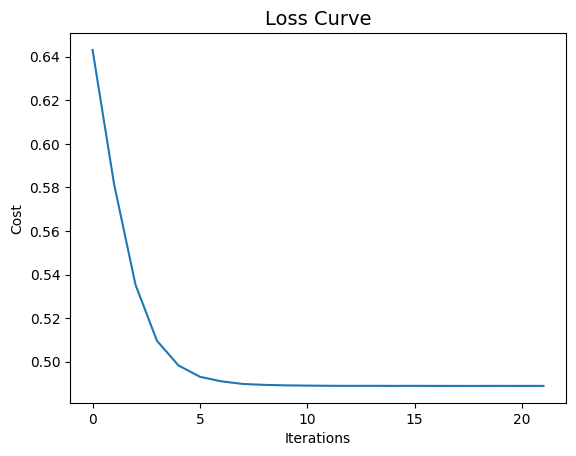

In [52]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [57]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(trainX, trainY)
y_pred_random = random_forest.predict(testX)
print('Accuracy: {:.2f}'.format(accuracy_score(y_pred_random, testY)))

Accuracy: 0.83


Text(0.5, 1.0, 'Confusion Matrix')

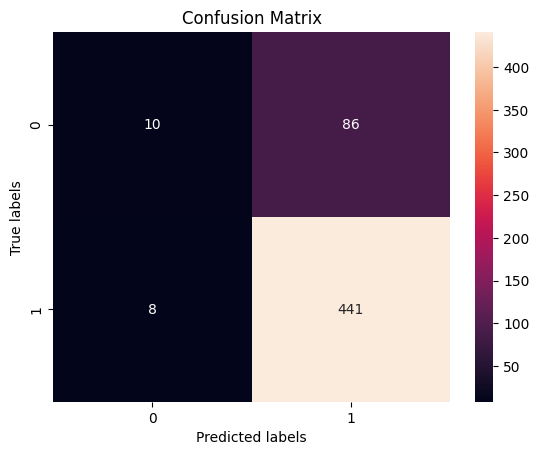

In [58]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm1 = confusion_matrix(testY, y_pred_random)
cm1
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(cm1, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')

In [60]:
from sklearn.naive_bayes import GaussianNB
clase_bayes = GaussianNB()
clase_bayes.fit(trainX, trainY)
y_pred_bayes = clase_bayes.predict(testX)
print('Accuracy: {:.2f}'.format(accuracy_score(y_pred_bayes, testY)))

Accuracy: 0.76


Text(0.5, 1.0, 'Confusion Matrix')

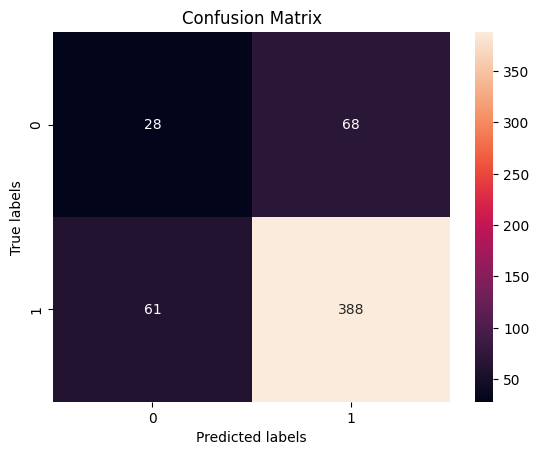

In [61]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm2 = confusion_matrix(testY, y_pred_bayes)
cm2
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(cm2, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')

In [65]:
from sklearn.svm import SVC
soporte_vect = SVC(decision_function_shape='ovr', kernel = "rbf", degree = 3)
soporte_vect.fit(trainX, trainY)
y_pred_sopor = soporte_vect.predict(testX)
print('Accuracy: {:.2f}'.format(accuracy_score(y_pred_sopor, testY)))

Accuracy: 0.83


Text(0.5, 1.0, 'Confusion Matrix')

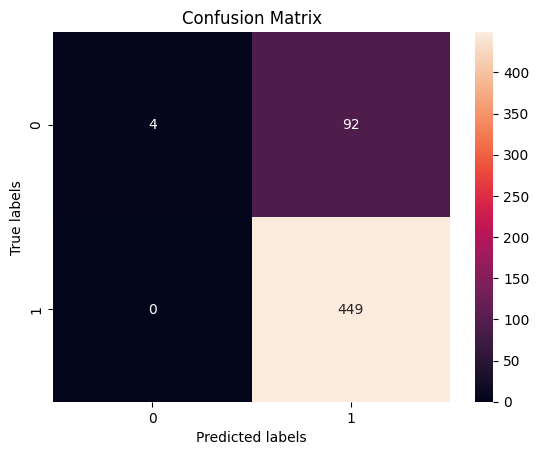

In [66]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm2 = confusion_matrix(testY, y_pred_sopor)
cm2
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(cm2, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')

In [68]:
trainX.columns

Index(['acu casa', 'acu trab', 'niñera', 'mayor', 'menor', 'solo',
       'otra persona', 'lejos', 'costoso', 'sin cupo', 'casa', 'edad',
       'otro motivo', 'si desa', 'no desa', 'si alm', 'no alm', 'si onces',
       'no onces', 'no comp madre', 'si comp madre', 'no comp padre',
       'si comp padre'],
      dtype='object')

In [69]:
import numpy as np
no_obs = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1]])
clase_bayes.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['No'], dtype='<U2')

In [75]:
no_obs1 = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]])
clase_bayes.predict(no_obs1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['No'], dtype='<U2')